In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
from sklearn.feature_selection import mutual_info_classif
from sklearn.compose import ColumnTransformer
#from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.set_option('display.max_columns', None)
from IPython.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df=pd.read_csv("/content/drive/MyDrive/L'algo de Paulo - mission 1 - datasets/AUTRES/Copie de NBAGAMES.csv", sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (58,64,65,68,79,93,96,114) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,GAME_DATE,MATCHUP_HOME,WL_HOME,MIN_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,VIDEO_AVAILABLE_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_DATE_EST,GAME_SEQUENCE,GAME_STATUS_ID,GAME_STATUS_TEXT,GAMECODE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,LIVE_PERIOD,LIVE_PC_TIME,NATL_TV_BROADCASTER_ABBREVIATION,LIVE_PERIOD_TIME_BCAST,WH_STATUS,TEAM_CITY_HOME,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,LARGEST_LEAD_HOME,LEAD_CHANGES_HOME,TIMES_TIED_HOME,TEAM_TURNOVERS_HOME,TOTAL_TURNOVERS_HOME,TEAM_REBOUNDS_HOME,PTS_OFF_TO_HOME,TEAM_CITY_AWAY,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,LEAGUE_ID,GAME_DATE_DAY,ATTENDANCE,GAME_TIME,TEAM_CITY_NAME_HOME,TEAM_NICKNAME_HOME,TEAM_WINS_LOSSES_HOME,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_OT1_HOME,PTS_OT2_HOME,PTS_OT3_HOME,PTS_OT4_HOME,PTS_OT5_HOME,PTS_OT6_HOME,PTS_OT7_HOME,PTS_OT8_HOME,PTS_OT9_HOME,PTS_OT10_HOME,PTS_HOME_y,TEAM_CITY_NAME_AWAY,TEAM_NICKNAME_AWAY,TEAM_WINS_LOSSES_AWAY,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_ID,LAST_GAME_DATE_EST,LAST_GAME_HOME_TEAM_ID,LAST_GAME_HOME_TEAM_CITY,LAST_GAME_HOME_TEAM_NAME,LAST_GAME_HOME_TEAM_ABBREVIATION,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_ID,LAST_GAME_VISITOR_TEAM_CITY,LAST_GAME_VISITOR_TEAM_NAME,LAST_GAME_VISITOR_TEAM_CITY1,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,VIDEO_AVAILABLE_FLAG,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS,HISTORICAL_STATUS
0,24600001,21946,1610610035,HUS,Toronto Huskies,1946-11-01,HUS vs. NYK,L,0,25.0,NaN,NaN,NaN,NaN,NaN,16.0,29.0,0.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,-2,0,1610612752,NYK,New York Knicks,NYK @ HUS,W,0,24.0,NaN,NaN,NaN,NaN,NaN,20.0,26.0,0.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,2,0,1946-11-01T00:00:00,NaN,3,NaN,19461101/NYKHUS,1610610035,1610612752,1946,5.0,NaN,NaN,Q5 -,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"FRIDAY, NOVEMBER 1, 1946",NaN,NaN,Toronto,Huskies,0,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,New York,Knicks,0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,Tied,0.0,0.0,0.0,0.0,1.0
1,24600003,21946,1610610034,BOM,St. Louis Bombers,1946-11-02,BOM vs. PIT,W,0,20.0,59.0,0.339,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,56,5,0,1610610031,PIT,Pittsburgh Ironmen,PIT @ BOM,L,0,16.0,72.0,0.222,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51,-5,0,1946-11-02T00:00:00,NaN,3,NaN,19461102/PITBOM,1610610034,1610610031,1946,4.0,NaN,NaN,Q4 -,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SATURDAY, NOVEMBER 2, 1946",NaN,NaN,St. Louis,Bombers,0,16.0,16.0,18.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,Pittsburgh,Ironmen,0,5.0,15.0,17.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,St. Louis,0.0,0.0,0.0,0.0,1.0
2,24600004,21946,1610610025,CHS,Chicago Stags,1946-11-02,CHS vs. NYK,W,0,21.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,63,16,0,1610612752,NYK,New York Knicks,NYK @ CHS,L,0,16.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47,-16,0,1946-11-02T00:00:00,NaN,3,NaN,19461102/NYKCHS,

# ETUDE LA PLUS SIMPLE, SANS LES VARIABLES CATEGORIELLES

In [ ]:
# columns to drop 
df = df.drop(['GAME_ID','TEAM_NAME_HOME','MATCHUP_HOME','FGM_HOME','FGA_HOME','FG3M_HOME','FG3A_HOME','FTM_HOME','FTA_HOME','PLUS_MINUS_HOME','VIDEO_AVAILABLE_HOME','TEAM_NAME_AWAY',
'MATCHUP_AWAY','MIN_AWAY','FGM_AWAY','FGA_AWAY','FG3M_AWAY','FG3A_AWAY','FTM_AWAY','FTA_AWAY','VIDEO_AVAILABLE_AWAY','GAME_STATUS_ID','GAMECODE','LIVE_PERIOD','LIVE_PC_TIME','NATL_TV_BROADCASTER_ABBREVIATION',
'LIVE_PERIOD_TIME_BCAST','WH_STATUS','TEAM_CITY_HOME','LEAD_CHANGES_HOME','TIMES_TIED_HOME','TEAM_TURNOVERS_HOME','TOTAL_TURNOVERS_HOME','TEAM_REBOUNDS_HOME','TEAM_CITY_AWAY','PTS_FB_AWAY','LEAD_CHANGES_AWAY',
'TEAM_TURNOVERS_AWAY','TOTAL_TURNOVERS_AWAY','TEAM_REBOUNDS_AWAY','LEAGUE_ID','GAME_DATE_DAY','TEAM_CITY_NAME_HOME','TEAM_NICKNAME_HOME','PTS_OT2_HOME','PTS_OT3_HOME','PTS_OT5_HOME','PTS_OT6_HOME','PTS_OT7_HOME',
'PTS_OT8_HOME','PTS_OT9_HOME','PTS_OT10_HOME','PTS_HOME_y', 'TEAM_CITY_NAME_AWAY','TEAM_NICKNAME_AWAY','PTS_OT2_AWAY','PTS_OT3_AWAY','PTS_OT5_AWAY','PTS_OT6_AWAY','PTS_OT7_AWAY','PTS_OT8_AWAY','PTS_OT9_AWAY',
'PTS_OT10_AWAY','LAST_GAME_ID','LAST_GAME_HOME_TEAM_ID','LAST_GAME_HOME_TEAM_CITY','LAST_GAME_HOME_TEAM_ABBREVIATION','LAST_GAME_VISITOR_TEAM_ID','LAST_GAME_VISITOR_TEAM_CITY','LAST_GAME_VISITOR_TEAM_CITY1','SERIES_LEADER',
'VIDEO_AVAILABLE_FLAG','PT_AVAILABLE','HUSTLE_STATUS','HISTORICAL_STATUS','GAME_DATE_EST',"LAST_GAME_HOME_TEAM_NAME","LAST_GAME_VISITOR_TEAM_NAME",'GAME_TIME','PTS_QTR1_HOME','PTS_QTR2_HOME',
'PTS_QTR3_HOME', 'PTS_QTR4_HOME','PTS_QTR1_AWAY','PTS_QTR2_AWAY','PTS_QTR3_AWAY', 'PTS_QTR4_AWAY', 'HOME_TEAM_WINS', 'HOME_TEAM_LOSSES','PTS_AWAY', 'FG_PCT_AWAY', 'PTS_HOME','DREB_AWAY','LARGEST_LEAD_HOME',
'FG_PCT_HOME','LARGEST_LEAD_AWAY','PLUS_MINUS_AWAY','TEAM_ABBREVIATION_HOME', 'TEAM_ABBREVIATION_AWAY','GAME_STATUS_TEXT','TEAM_WINS_LOSSES_HOME','TEAM_WINS_LOSSES_AWAY', 'TEAM_WINS_LOSSES_HOME'
],axis=1)  #'FG3_PCT_AWAY', 'FG3_PCT_HOME'

In [ ]:
# copie du df avant tests de festure engineering
df_bis=df.copy()

In [ ]:
# inutile pour cette étude
#import datetime
#df_bis['GAME_DATE'] = pd.to_datetime(df_bis.GAME_DATE)
#df_bis['LAST_GAME_DATE_EST'] = pd.to_datetime(df_bis.LAST_GAME_DATE_EST)
#df_bis['TimeBtw2Games'] = df_bis['GAME_DATE'] - df_bis['LAST_GAME_DATE_EST']
#df_bis['TEAM_WINS_LOSSES_HOME'] = df_bis['TEAM_WINS_LOSSES_HOME'].astype('str')
#df_bis['TEAM_WINS_LOSSES_HOME'].isna() #OK pas de NAN
#df_bis['TEAM_WINS_LOSSES_HOME_VIC'] = df_bis['TEAM_WINS_LOSSES_HOME'].apply(lambda x : x.split('-')[0])
#df_bis['TEAM_WINS_LOSSES_HOME_DEF'] = df_bis['TEAM_WINS_LOSSES_HOME'].apply(lambda x : x.split('-')[-1])
#df_bis = df_bis.drop(['TEAM_WINS_LOSSES_HOME'], axis=1)
#df_bis['TEAM_WINS_LOSSES_AWAY'] = df_bis['TEAM_WINS_LOSSES_AWAY'].astype('str')
#df_bis['TEAM_WINS_LOSSES_AWAY_VIC'] = df_bis['TEAM_WINS_LOSSES_AWAY'].apply(lambda x : x.split('-')[0])
#df_bis['TEAM_WINS_LOSSES_AWAY_DEF'] = df_bis['TEAM_WINS_LOSSES_AWAY'].apply(lambda x : x.split('-')[-1])

In [ ]:
df_ter = df_bis.iloc[60304:,:] # CHOIX DES 2 DERNIERES ANNEES

In [ ]:
df_ter.head()

,SEASON_ID,TEAM_ID_HOME,GAME_DATE,WL_HOME,MIN_HOME,FG3_PCT_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,TEAM_ID_AWAY,WL_AWAY,FG3_PCT_AWAY,FT_PCT_AWAY,OREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,GAME_SEQUENCE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,PTS_OFF_TO_HOME,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,TIMES_TIED_AWAY,PTS_OFF_TO_AWAY,ATTENDANCE,PTS_OT1_HOME,PTS_OT4_HOME,PTS_OT1_AWAY,PTS_OT4_AWAY,LAST_GAME_DATE_EST,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,PT_XYZ_AVAILABLE
60304,22019,1610612746,2019-10-22,W,240,0.355,0.708,11.0,34.0,45.0,24.0,8.0,5.0,14.0,25.0,1610612747,L,0.394,0.714,9.0,41.0,20.0,4.0,7.0,15.0,24.0,2.0,1610612746,1610612747,2019,42.0,12.0,22.0,17.0,40.0,6.0,5.0,25.0,19068.0,0.0,0.0,0.0,0.0,2019-04-05T00:00:00,117.0,122.0,1.0
60305,22019,1610612761,2019-10-22,W,265,0.350,0.842,16.0,41.0,57.0,23.0,7.0,3.0,17.0,24.0,1610612740,L,0.422,0.850,16.0,53.0,30.0,4.0,9.0,19.0,34.0,1.0,1610612761,1610612740,2019,56.0,19.0,20.0,20.0,38.0,9.0,14.0,22.0,20787.0,13.0,0.0,5.0,0.0,2019-03-08T00:00:00,127.0,104.0,1.0
60306,22019,1610612755,2019-10-23,W,240,0.241,0.722,12.0,50.0,62.0,24.0,6.0,7.0,17.0,34.0,1610612738,L,0.269,0.588,10.0,41.0,18.0,4.0,2.0,11.0,29.0,6.0,1610612755,1610612738,2019,58.0,17.0,14.0,20.0,44.0,14.0,8.0,11.0,20422.0,0.0,0.0,0.0,0.0,2019-03-20T00:00:00,118.0,115.0,1.0
60307,22019,1610612759,2019-10-23,W,240,0.333,0.806,10.0,41.0,51.0,22.0,6.0,5.0,21.0,18.0,1610612752,L,0.333,0.722,5.0,39.0,24.0,16.0,1.0,14.0,32.0,8.0,1610612759,1610612752,2019,54.0,13.0,30.0,32.0,58.0,4.0,4.0,16.0,18354.0,0.0,0.0,0.0,0.0,2019-03-15T00:00:00,109.0,83.0,1.0
60308,22019,1610612756,2019-10-23,W,240,0.333,0.833,9.0,35.0,44.0,31.0,13.0,9.0,14.0,25.0,1610612758,L,0.345,0.654,12.0,47.0,17.0,5.0,5.0,27.0,24.0,10.0,1610612756,1610612758,2019,68.0,18.0,27.0,6.0,34.0,15.0,9.0,35.0,18055.0,0.0,0.0,0.0,0.0,2019-10-10T00:00:00,88.0,105.0,1.0


In [ ]:
cols_with_missing = [col for col in df_ter.columns if df_ter[col].isna().any()]
len(cols_with_missing)

19

In [ ]:
# REMPLACEMENT DES VALEURS MANQUANTES NAN DE TYPE NUMERIC PAR LEUR MOYENNE
num_column2=[col for col in df_ter.columns if df_ter[col].dtype in ['int64','float64']]

In [ ]:
df_ter_num = df_ter[num_column2]

In [ ]:
column_means = df_ter_num. mean()

In [ ]:
for col in df_ter:
  df_ter_num = df_ter. fillna(column_means)

In [ ]:
# Nettoyage des lignes manquantes (données manquantes object)
df_ter_num = df_ter_num.dropna(axis=0)

In [ ]:
# SUPPRESSION DES VALEURS MANQUANTES NAN DE TYPE OBJECT PAR LEUR MODE
# [col for col in df_ter.columns if df_ter[col].dtype=='object']
# df_ter_obj = df_ter[object_column2]
# column_mode = df_ter_obj.mode()   # ABANDON PISTE MODE
# for col in df_ter_obj:
  #df_ter_obj = df_ter_obj.dropna(object_column2)

In [ ]:
df_ter_num['WL_HOME'] = df_ter_num['WL_HOME'].replace(['W','L'],[1,0]) # ou df[].map

In [ ]:
df_ter_num['WL_AWAY']=df_ter_num['WL_AWAY'].replace(['W','L'],[1,0])

In [ ]:
df_ter_num.head()

,SEASON_ID,TEAM_ID_HOME,GAME_DATE,WL_HOME,MIN_HOME,FG3_PCT_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,TEAM_ID_AWAY,WL_AWAY,FG3_PCT_AWAY,FT_PCT_AWAY,OREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,GAME_SEQUENCE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,PTS_OFF_TO_HOME,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,TIMES_TIED_AWAY,PTS_OFF_TO_AWAY,ATTENDANCE,PTS_OT1_HOME,PTS_OT4_HOME,PTS_OT1_AWAY,PTS_OT4_AWAY,LAST_GAME_DATE_EST,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,PT_XYZ_AVAILABLE
60304,22019,1610612746,2019-10-22,1,240,0.355,0.708,11.0,34.0,45.0,24.0,8.0,5.0,14.0,25.0,1610612747,0,0.394,0.714,9.0,41.0,20.0,4.0,7.0,15.0,24.0,2.0,1610612746,1610612747,2019,42.0,12.0,22.0,17.0,40.0,6.0,5.0,25.0,19068.0,0.0,0.0,0.0,0.0,2019-04-05T00:00:00,117.0,122.0,1.0
60305,22019,1610612761,2019-10-22,1,265,0.350,0.842,16.0,41.0,57.0,23.0,7.0,3.0,17.0,24.0,1610612740,0,0.422,0.850,16.0,53.0,30.0,4.0,9.0,19.0,34.0,1.0,1610612761,1610612740,2019,56.0,19.0,20.0,20.0,38.0,9.0,14.0,22.0,20787.0,13.0,0.0,5.0,0.0,2019-03-08T00:00:00,127.0,104.0,1.0
60306,22019,1610612755,2019-10-23,1,240,0.241,0.722,12.0,50.0,62.0,24.0,6.0,7.0,17.0,34.0,1610612738,0,0.269,0.588,10.0,41.0,18.0,4.0,2.0,11.0,29.0,6.0,1610612755,1610612738,2019,58.0,17.0,14.0,20.0,44.0,14.0,8.0,11.0,20422.0,0.0,0.0,0.0,0.0,2019-03-20T00:00:00,118.0,115.0,1.0
60307,22019,1610612759,2019-10-23,1,240,0.333,0.806,10.0,41.0,51.0,22.0,6.0,5.0,21.0,18.0,1610612752,0,0.333,0.722,5.0,39.0,24.0,16.0,1.0,14.0,32.0,8.0,1610612759,1610612752,2019,54.0,13.0,30.0,32.0,58.0,4.0,4.0,16.0,18354.0,0.0,0.0,0.0,0.0,2019-03-15T00:00:00,109.0,83.0,1.0
60308,22019,1610612756,2019-10-23,1,240,0.333,0.833,9.0,35.0,44.0,31.0,13.0,9.0,14.0,25.0,1610612758,0,0.345,0.654,12.0,47.0,17.0,5.0,5.0,27.0,24.0,10.0,1610612756,1610612758,2019,68.0,18.0,27.0,6.0,34.0,15.0,9.0,35.0,18055.0,0.0,0.0,0.0,0.0,2019-10-10T00:00:00,88.0,105.0,1.0


In [ ]:
y=df_ter_num['WL_HOME']

In [ ]:
X=df_ter_num.drop(['WL_HOME','WL_AWAY',"GAME_DATE","LAST_GAME_DATE_EST"],axis=1)  #

In [ ]:
print('X_shape:',X.shape,'\n \n','y_shape:',y.shape)

X_shape: (2099, 43) 
 
 y_shape: (2099,)


In [ ]:
X.dtypes

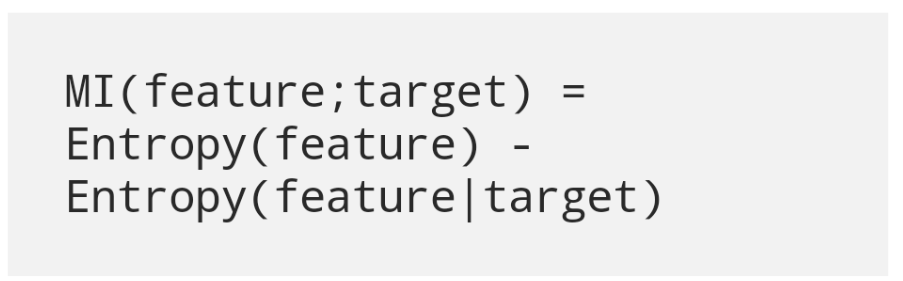

In [ ]:
def make_mi_scores(X,y,discrete_features):
  mi_scores = mutual_info_classif (X,y,discrete_features=discrete_features)
  mi_scores = pd.Series (mi_scores, name='MI Scores', index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

In [ ]:
def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width=np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width,ticks)
  plt.title("Mutual Inf Scores")

In [ ]:
discrete_features = ((X.dtypes =='int64') | (X.dtypes == 'float64'))

In [ ]:
scores = make_mi_scores(X,y,discrete_features)

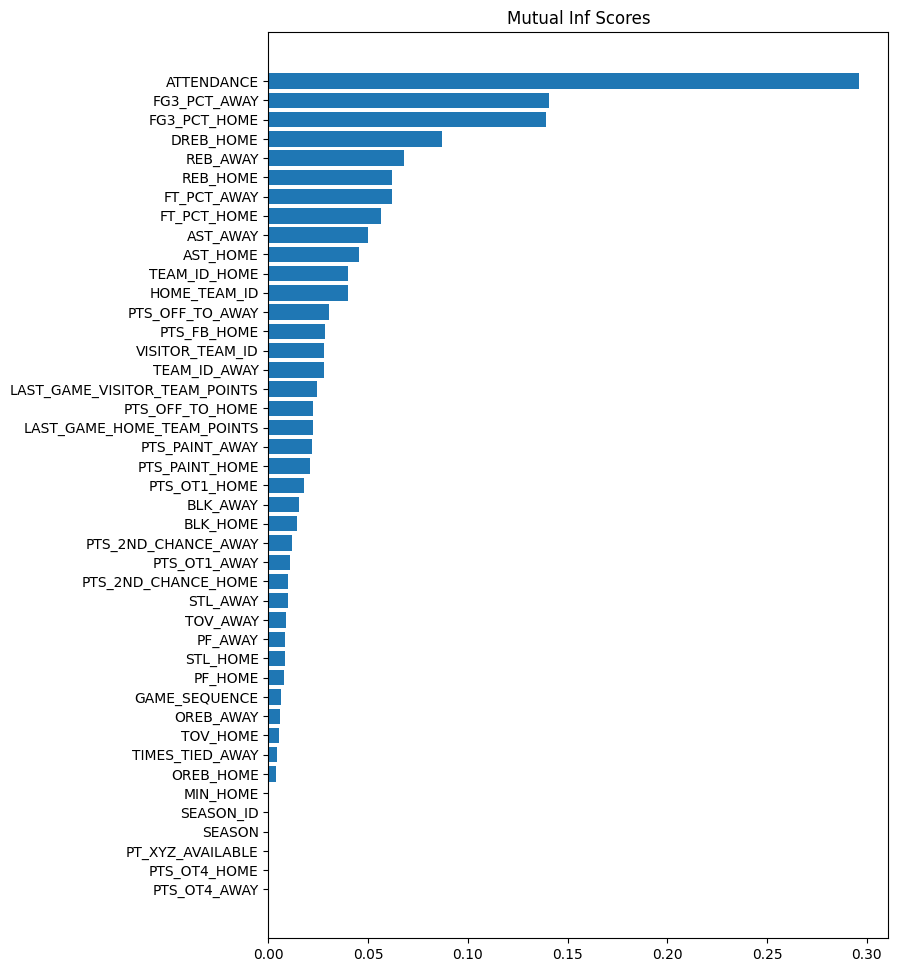

In [ ]:
plt.figure(dpi=100, figsize=(8,12))
plot_mi_scores(scores)